# Knowledge Discovery in Databases
## Final Project

Team Members:<br>
<ul>
    <li>Ravina Gaikawad</li>
    <li>Sahithi Priya Gutta</li>
    <li>Uma Sai Madhuri Jetty</li>
    <li>Kevin Thomas</li>
</ul>

### Importing Data

Note: data should be located in a folder called Data, located in the same directory as the notebook.<br>
Example: ../Project/Data/something.csv

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from datetime import datetime
import missingno as msno 
import seaborn as sns

In [2]:
train_data = pd.read_csv("./Data/train.csv")
# test_data = pd.read_csv("./Data/test.csv")
# meta_data = pd.read_csv("./Data/building_metadata.csv")
# weather_train_data = pd.read_csv("./Data/weather_train.csv")
# weather_test_data = pd.read_csv("./Data/weather_test.csv")

In [3]:
meta_data = pd.read_csv("./Data/building_metadata.csv")

In [4]:
weather_train_data = pd.read_csv("./Data/weather_train.csv")

In [5]:
# sample = pd.read_csv("./Data/sample_submission.csv")

### Preparing the Data

In [6]:
train_data.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [8]:
train_data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


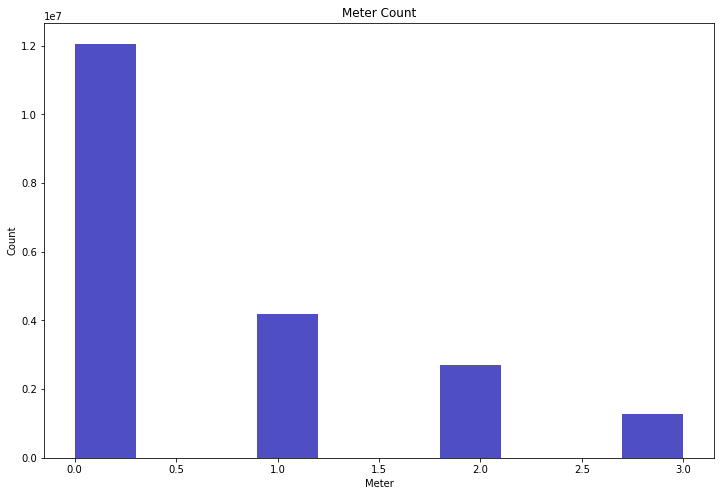

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(x=train_data.meter, color='#0504aa',alpha=0.7)
plt.title("Meter Count")
plt.xlabel("Meter")
plt.ylabel("Count")
plt.show()

In [10]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
floor_count    355 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [11]:
meta_data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


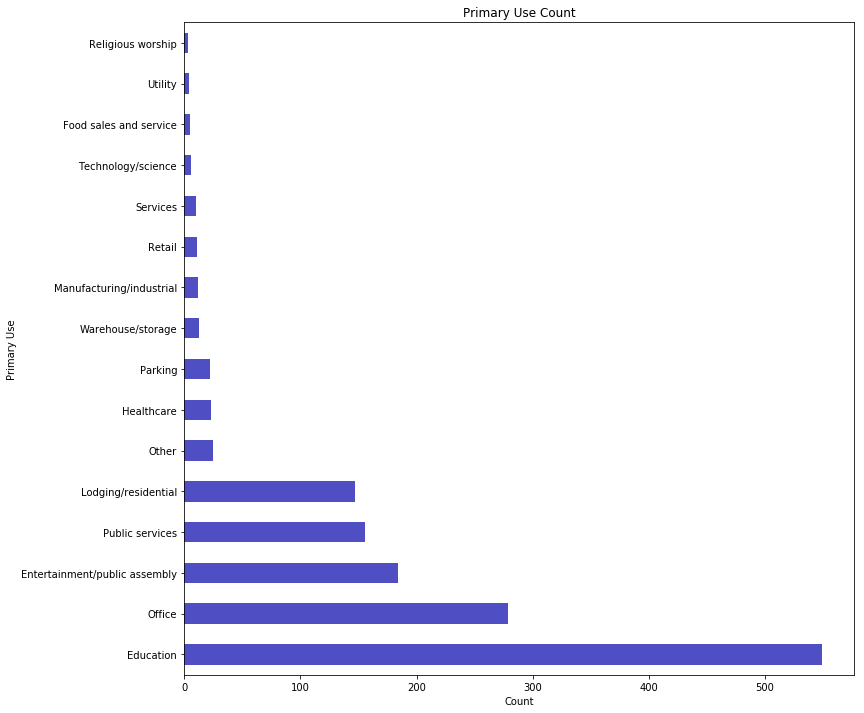

In [12]:
plt.figure(figsize=(12, 12))
meta_data.primary_use.value_counts().plot(kind='barh', color='#0504aa',alpha=0.7, width = 0.5)
plt.title("Primary Use Count")
plt.xlabel("Count")
plt.ylabel("Primary Use")
plt.show()

# plt.figure(figsize=[10,8])

# plt.bar(meta_data.primary_use, , width = 0.5, color='#0504aa',alpha=0.7)
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Value',fontsize=15)
# plt.ylabel('Frequency',fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.ylabel('Frequency',fontsize=15)
# plt.title('Normal Distribution Histogram',fontsize=15)
# plt.show()

Due to the large amount of missing values in the "year_built" and "floor_count" columns in the building metadata table, we dropped these two columns. The use of square_feet enables us to ignore floor_count as they both represent the size of a building. While the age of a building will impact its power consumption, the sheer number of missing values in the dataset coupled with the inability to impute the values has prompted the dropping of this column.

In [13]:
meta_data = meta_data.drop(['year_built', 'floor_count'], axis=1)

In [14]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 4 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.4+ KB


In [15]:
weather_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [16]:
weather_train_data.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [17]:
weather_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [18]:
weather_train_data = weather_train_data.drop(['precip_depth_1_hr', 'cloud_coverage', 'sea_level_pressure', 'wind_direction'], axis=1)

Due to the large amount of missing values in 'precip_depth_1_hr', 'cloud_coverage', 'sea_level_pressure', 'wind_direction'   columns in the building weather_train_data table, we dropped these columns. 

In [19]:
weather_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 5 columns):
site_id            139773 non-null int64
timestamp          139773 non-null object
air_temperature    139718 non-null float64
dew_temperature    139660 non-null float64
wind_speed         139469 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.3+ MB


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


Splitting the timestamp variable in the train dataset into two columns: date and time. Both columns are of type datetime.

In [21]:
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

In [22]:
# train_data['date'] = train_data['timestamp'].dt.date
train_data['date'] = train_data['timestamp'].dt.normalize()

In [23]:
train_data['time'] = train_data['timestamp'].dt.time
train_data['hour'] = pd.to_datetime(train_data['time'], format='%H:%M:%S').dt.hour

In [24]:
train_data = train_data.drop(['time'], axis = 1)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 6 columns):
building_id      int64
meter            int64
timestamp        datetime64[ns]
meter_reading    float64
date             datetime64[ns]
hour             int64
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 925.4 MB


Splitting the timestamp variable in the weather dataset into two columns: date and time. Both columns are of type datetime.

In [26]:
weather_train_data['timestamp'] = pd.to_datetime(weather_train_data['timestamp'])

In [27]:
weather_train_data['date'] = weather_train_data['timestamp'].dt.normalize()

In [28]:
weather_train_data['time'] = weather_train_data['timestamp'].dt.time
weather_train_data['hour'] = pd.to_datetime(weather_train_data['time'], format='%H:%M:%S').dt.hour

In [29]:
weather_train_data = weather_train_data.drop(['time'], axis = 1)

In [30]:
weather_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 7 columns):
site_id            139773 non-null int64
timestamp          139773 non-null datetime64[ns]
air_temperature    139718 non-null float64
dew_temperature    139660 non-null float64
wind_speed         139469 non-null float64
date               139773 non-null datetime64[ns]
hour               139773 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(2)
memory usage: 7.5 MB


In [31]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 4 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.4+ KB


Combining all the tables into one big dataset

Merging Building metadata and train dataset on the basis on building_id.

In [32]:
temp_merge = pd.merge(left=train_data, right=meta_data, left_on='building_id', right_on='building_id', how='outer')

In [33]:
temp_merge.head()

,building_id,meter,timestamp,meter_reading,date,hour,site_id,primary_use,square_feet
0,0,0,2016-01-01 00:00:00,0.0,2016-01-01,0,0,Education,7432
1,0,0,2016-01-01 01:00:00,0.0,2016-01-01,1,0,Education,7432
2,0,0,2016-01-01 02:00:00,0.0,2016-01-01,2,0,Education,7432
3,0,0,2016-01-01 03:00:00,0.0,2016-01-01,3,0,Education,7432
4,0,0,2016-01-01 04:00:00,0.0,2016-01-01,4,0,Education,7432


In [34]:
temp_merge.isna().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
date             0
hour             0
site_id          0
primary_use      0
square_feet      0
dtype: int64

Merging weather data and the combined table from the last merge step into the final table. This is done on the basis of site_id, date and hour.

In [35]:
train = pd.merge(left=temp_merge, right=weather_train_data, left_on=['site_id', 'date', 'hour'], right_on=['site_id', 'date', 'hour'], how='outer')

Deleting the unnecessary variables to save memory.

In [36]:
del temp_merge, train_data, meta_data, weather_train_data

In [37]:
train.head()

,building_id,meter,timestamp_x,meter_reading,date,hour,site_id,primary_use,square_feet,timestamp_y,air_temperature,dew_temperature,wind_speed
0,0.0,0.0,2016-01-01,0.0,2016-01-01,0,0,Education,7432.0,2016-01-01,25.0,20.0,0.0
1,1.0,0.0,2016-01-01,0.0,2016-01-01,0,0,Education,2720.0,2016-01-01,25.0,20.0,0.0
2,2.0,0.0,2016-01-01,0.0,2016-01-01,0,0,Education,5376.0,2016-01-01,25.0,20.0,0.0
3,3.0,0.0,2016-01-01,0.0,2016-01-01,0,0,Education,23685.0,2016-01-01,25.0,20.0,0.0
4,4.0,0.0,2016-01-01,0.0,2016-01-01,0,0,Education,116607.0,2016-01-01,25.0,20.0,0.0


In [38]:
train.isna().sum()

building_id           135
meter                 135
timestamp_x           135
meter_reading         135
date                    0
hour                    0
site_id                 0
primary_use           135
square_feet           135
timestamp_y         90495
air_temperature     96658
dew_temperature    100140
wind_speed         143676
dtype: int64

In [39]:
train.drop_duplicates(inplace=True)

In [40]:
train = train.dropna(axis=0, subset=['building_id'])

Dropping some column artifacts.

In [41]:
train = train.drop(['timestamp_x', 'timestamp_y'], axis=1)

In [42]:
train.isna().sum()

building_id             0
meter                   0
meter_reading           0
date                    0
hour                    0
site_id                 0
primary_use             0
square_feet             0
air_temperature     96658
dew_temperature    100140
wind_speed         143676
dtype: int64

We can see that the above dataframe is very large in size, thus occupying a good portion of a system's memory. To counter this, we downgrade the datatypes into their lowest memory variants. This reduces the size greatly.

In [43]:
#Function to minimize the size of the dataset
def minimize_size(df):
    int_dtype = ['int8', 'int16', 'int32', 'int64']
    float_dtype = ['float16', 'float32', 'float64']
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in int_dtype:
            df[col]=df[col].astype(np.int8)
        if col_type in float_dtype:
            df[col]=df[col].astype(np.float16)
    return df

In [44]:
train = minimize_size(train)

In [45]:
train.primary_use = train.primary_use.astype("category")

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 11 columns):
building_id        float16
meter              float16
meter_reading      float16
date               datetime64[ns]
hour               int8
site_id            int8
primary_use        category
square_feet        float16
air_temperature    float16
dew_temperature    float16
wind_speed         float16
dtypes: category(1), datetime64[ns](1), float16(7), int8(2)
memory usage: 636.2 MB


To save compute time, we store the dataset in a pickle file

In [47]:
train.to_pickle("train_data.pkl")

In [48]:
del train

The data can be read from the pickle file using the following command.

In [49]:
train = pd.read_pickle("train_data.pkl")

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 11 columns):
building_id        float16
meter              float16
meter_reading      float16
date               datetime64[ns]
hour               int8
site_id            int8
primary_use        category
square_feet        float16
air_temperature    float16
dew_temperature    float16
wind_speed         float16
dtypes: category(1), datetime64[ns](1), float16(7), int8(2)
memory usage: 636.2 MB


In [51]:
train.isna().sum()

building_id             0
meter                   0
meter_reading           0
date                    0
hour                    0
site_id                 0
primary_use             0
square_feet             0
air_temperature     96658
dew_temperature    100140
wind_speed         143676
dtype: int64

In [52]:
cols = ['building_id', 'date', 'hour', 'site_id', 'primary_use', 'square_feet', 'air_temperature', 'dew_temperature', 'wind_speed']

In [53]:
train.meter = train.meter.astype(np.int8)

In [54]:
train.meter_reading = train.meter_reading.astype(np.float64)

### Exploratory Data Analysis

Visualising Missingness

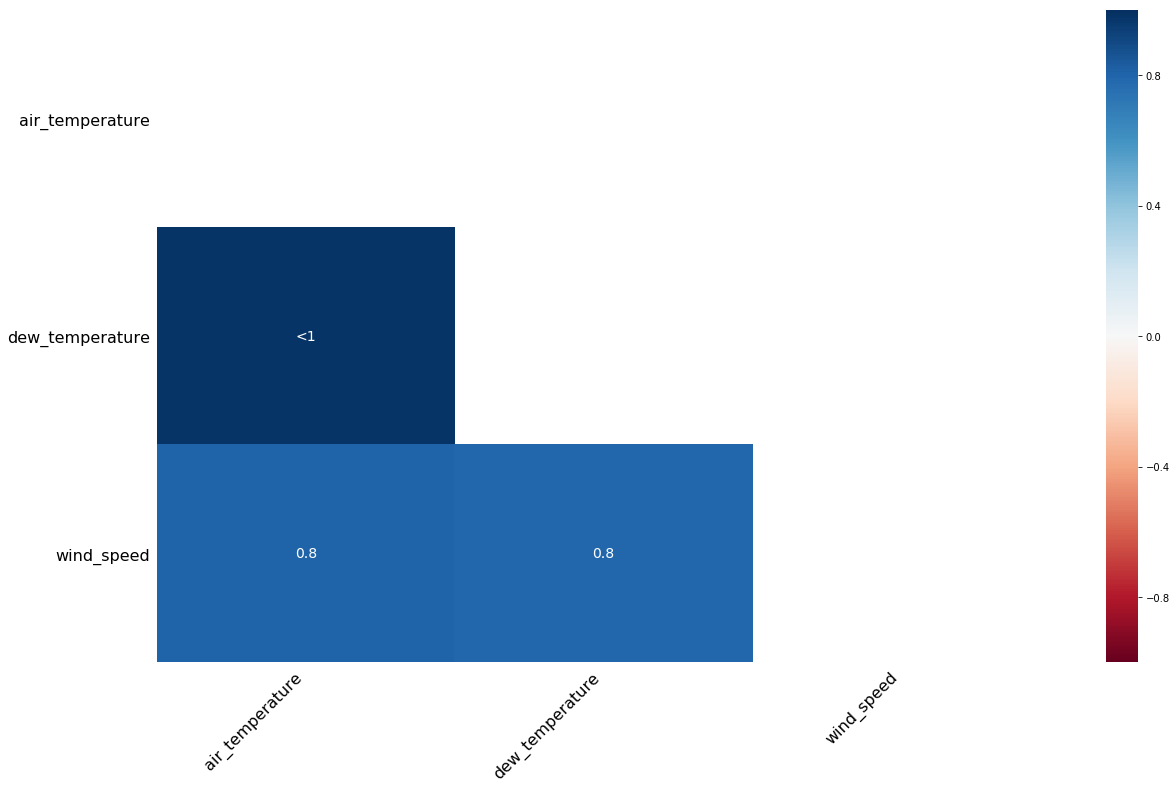

In [55]:
msno.heatmap(train) 

The above plot shows us that all the missing values are conventrated in three columns: dew_tempterature, windspeed and air_temperature. However, there doesn't seem to be a corelation between the missingness of these values.

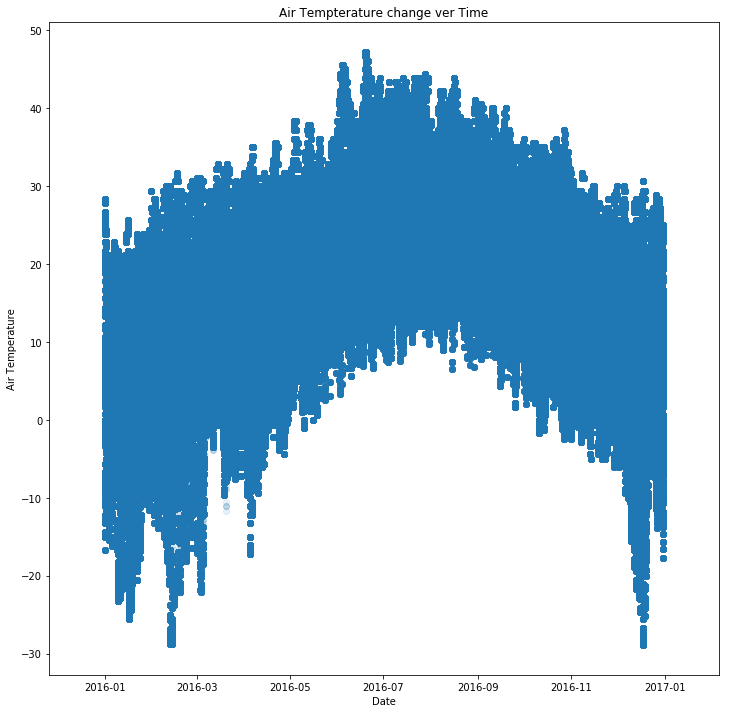

In [56]:
plt.figure(figsize=(12, 12))
plt.scatter(train.date, train.air_temperature, alpha=0.1, cmap='viridis')
plt.title('Air Tempterature change ver Time')
plt.xlabel('Date')
plt.ylabel('Air Temperature')
plt.show()